In [2]:
import pandas as pd
import numpy as np
from scipy.stats.distributions import gamma

from epimodel import read_csv
from modeling.nowcasting.nowcasting import exp_model

In [3]:
csse_ds = read_csv("../../data/CSSE.csv")

csse_ds = csse_ds.loc[csse_ds.index.dropna(),:]
csse_ds = csse_ds.loc[~(csse_ds.index.get_level_values(0)=='CA'),:]

This is the infection to death distribution from the [ICL Paper](https://www.imperial.ac.uk/media/imperial-college/medicine/mrc-gida/2020-03-30-COVID19-Report-13.pdf)

In [4]:
ICL_ITD = gamma(1/0.45**2,0,18.8*0.45**2)

DEATHS_DAYS = np.array([ICL_ITD.cdf(a+1)-ICL_ITD.cdf(a) for a in range(40)])

The aim is to estimate exposed + infected (in GLEAMViz terminology) for each day. The first step is to calculate new infections timeshifted back by 7 days. The figure 7 comes from:
 - 5.5 days infection-to-symptoms (https://docs.google.com/spreadsheets/d/1yzVSp71jiCsoD_L6sXchfg8L9OF0tGHWEnCdfvF73Ac/edit#gid=1242721729)
 - 4 days symptoms-to-confirmation (also https://docs.google.com/spreadsheets/d/1yzVSp71jiCsoD_L6sXchfg8L9OF0tGHWEnCdfvF73Ac/edit#gid=1242721729)
 - Subtract two days as exponential growth means that fast confirmations will be overrepresented
 
We could in principle calculate this properly (as below), but it is less crucial than calculating infection to death properly.

We'd like to fill in the last 7 days with nowcasting, but it's too unstable to be usable right now.

In [5]:
def transformCases(s):
    shifted = s.diff().shift(-7)
    # When nowcasting works
    # shifted[-7:] = np.array(exp_model(7,shifted[-14:-7],shifted.index.get_level_values(1)[-7],7,7))[:,1]
    #shifted = shifted.fillna(shifted.dropna()[-1])
    return shifted

csse_ds['New Confirmed Shifted'] = csse_ds['Confirmed'].groupby(level=0).transform(transformCases)
csse_ds['New Deaths'] = csse_ds['Deaths'].groupby(level=0).transform(lambda x: x.diff())
csse_ds.loc['IT'][-24:]

,Recovered,Confirmed,Deaths,Active,New Confirmed Shifted,New Deaths
Date,,,,,,
2020-03-15 00:00:00+00:00,2335.0,24747.0,1809.0,20603.0,5560.0,368.0
2020-03-16 00:00:00+00:00,2749.0,27980.0,2158.0,23073.0,4789.0,349.0
2020-03-17 00:00:00+00:00,2941.0,31506.0,2503.0,26062.0,5249.0,345.0
2020-03-18 00:00:00+00:00,4025.0,35713.0,2978.0,28710.0,5210.0,475.0
2020-03-19 00:00:00+00:00,4440.0,41035.0,3405.0,33190.0,6203.0,427.0
2020-03-20 00:00:00+00:00,4440.0,47021.0,4032.0,38549.0,5909.0,627.0
2020-03-21 00:00:00+00:00,6072.0,53578.0,4825.0,42681.0,5974.0,793.0
2020-03-22 00:00:00+00:00,7024.0,59138.0,5476.0,46638.0,5217.0,651.0
2020-03-23 00:00:00+00:00,7024.0,63927.0,6077.0,50826.0,4050.0,601.0


The number of deaths on day $i$ should be
$$ d_i = f \sum_j p_{i-j} t_j $$
where $f$ is the infection fatality rate, $p_k$ is the probability of dieing $k$ days after being infected and $t_j$ is the true number of cases on day $j$.

Suppose that there is a fixed ascertainment rate $a$ such that confirmed cases $c_j=a t_{j-7}$ for all $j$. Then 

$$ a = \frac{f\sum_j p_{i-j} c_{j+7}}{d_{i}} $$

**Note** This is actually *lagged* ascertainment rate - it asks "what fraction of new cases today are detected 7 days later". I don't directly estimate an instantaneous ascertainment rate as this is very sensitive to the short term trajectory of infections, which, as I note above, I can't yet forecast. What we can in fact calculate is:

$$ t_{i-7} = \frac{c_i}{a}  $$

Th

In [17]:
def expectation(s,fatality=0.007):
    cv = np.convolve(s,DEATHS_DAYS,'valid')
    pw = len(s)-len(cv)
    return fatality*np.pad(cv,(pw,0),"constant",constant_values=np.nan)


In [7]:
g = csse_ds.groupby(level=0)

csse_ds['Expdeaths'] = g['New Confirmed Shifted'].transform(expectation)
csse_ds['Ascertainment'] = csse_ds['Expdeaths']/csse_ds['New Deaths']

According to this method, ascertainment in Italy may be rising slightly

In [8]:
csse_ds.loc['IT'][-40:]

,Recovered,Confirmed,Deaths,Active,New Confirmed Shifted,New Deaths,Expdeaths,Ascertainment
Date,,,,,,,,
2020-02-28 00:00:00+00:00,46.0,888.0,21.0,821.0,778.0,4.0,NaN,NaN
2020-02-29 00:00:00+00:00,46.0,1128.0,29.0,1053.0,1247.0,8.0,NaN,NaN
2020-03-01 00:00:00+00:00,83.0,1694.0,34.0,1577.0,1492.0,5.0,0.558583,0.111717
2020-03-02 00:00:00+00:00,149.0,2036.0,52.0,1835.0,1797.0,18.0,0.709019,0.039390
2020-03-03 00:00:00+00:00,160.0,2502.0,79.0,2263.0,977.0,27.0,0.891922,0.033034
2020-03-04 00:00:00+00:00,276.0,3089.0,107.0,2706.0,2313.0,28.0,1.113575,0.039771
2020-03-05 00:00:00+00:00,414.0,3858.0,148.0,3296.0,0.0,41.0,1.378600,0.033624
2020-03-06 00:00:00+00:00,523.0,4636.0,197.0,3916.0,5198.0,49.0,1.688765,0.034465
2020-03-07 00:00:00+00:00,589.0,5883.0,233.0,5061.0,3497.0,36.0,2.044879,0.056802


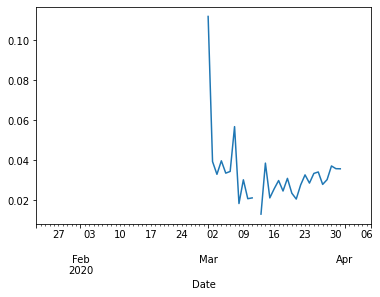

In [9]:
csse_ds.loc['IT','Ascertainment'].plot()

While ascertainment in Brazil looks steady

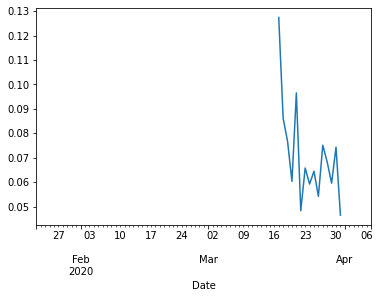

In [10]:
csse_ds.loc['BR','Ascertainment'].plot()

In [11]:
csse_ds.loc['BR'][-40:]

,Recovered,Confirmed,Deaths,Active,New Confirmed Shifted,New Deaths,Expdeaths,Ascertainment
Date,,,,,,,,
2020-02-28 00:00:00+00:00,0.0,1.0,0.0,1.0,9.0,0.0,NaN,NaN
2020-02-29 00:00:00+00:00,0.0,2.0,0.0,2.0,0.0,0.0,NaN,NaN
2020-03-01 00:00:00+00:00,0.0,2.0,0.0,2.0,7.0,0.0,0.000711,inf
2020-03-02 00:00:00+00:00,0.0,2.0,0.0,2.0,5.0,0.0,0.000996,inf
2020-03-03 00:00:00+00:00,0.0,2.0,0.0,2.0,6.0,0.0,0.001416,inf
2020-03-04 00:00:00+00:00,0.0,4.0,0.0,4.0,7.0,0.0,0.002005,inf
2020-03-05 00:00:00+00:00,0.0,4.0,0.0,4.0,14.0,0.0,0.002794,inf
2020-03-06 00:00:00+00:00,0.0,13.0,0.0,13.0,99.0,0.0,0.003822,inf
2020-03-07 00:00:00+00:00,0.0,13.0,0.0,13.0,0.0,0.0,0.005262,inf


In [14]:
14034/0.06

233900.0

In [13]:
86/0.03

2866.666666666667